# Dataset Exploration

In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import random

## Helper Functions

In [2]:
def calculate_video_durations(video_files):
    """Calculate duration for each video and return summary statistics"""
    total_duration_seconds = 0
    video_info = []

    print("Video Durations:")
    print("-" * 70)

    for video_file in video_files:
        cap = cv2.VideoCapture(str(video_file))
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration_seconds = frame_count / fps if fps > 0 else 0
        cap.release()
        
        total_duration_seconds += duration_seconds
        
        # Convert to minutes and seconds
        minutes = int(duration_seconds // 60)
        seconds = int(duration_seconds % 60)
        
        video_info.append({
            'name': video_file.name[:50],
            'duration_seconds': duration_seconds,
            'duration_str': f"{minutes}:{seconds:02d}"
        })
        
        print(f"{video_file.name[:50]:<50} {minutes:3d}:{seconds:02d}")

    print("-" * 70)

    # Convert total to hours, minutes, seconds
    total_hours = int(total_duration_seconds // 3600)
    total_minutes = int((total_duration_seconds % 3600) // 60)
    total_seconds = int(total_duration_seconds % 60)

    print(f"Total Duration: {total_hours}h {total_minutes}m {total_seconds}s ({total_duration_seconds:.1f} seconds)")
    print(f"Average Duration: {total_duration_seconds / len(video_files) / 60:.1f} minutes")
    
    return video_info, total_duration_seconds

In [3]:
def extract_random_frame(video_path):
    """Extract a random frame from a video file"""
    cap = cv2.VideoCapture(str(video_path))
    
    # Get total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Select a random frame (avoiding first and last 10% to get more interesting content)
    random_frame_idx = random.randint(int(total_frames * 0.1), int(total_frames * 0.9))
    
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)
    
    # Read the frame
    ret, frame = cap.read()
    cap.release()
    
    if ret:
        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        return frame_rgb
    else:
        return None

In [4]:
def extract_frames_from_videos(video_files, seed=40):
    """Extract random frames from a list of video files"""
    random.seed(seed)
    frames = []
    
    print(f"Found {len(video_files)} videos")
    print("Extracting random frames...\n")
    
    for video_file in video_files:
        print(f"Processing: {video_file.name[:60]}...")
        frame = extract_random_frame(video_file)
        if frame is not None:
            frames.append(frame)
        else:
            print(f"  Failed to extract frame from {video_file.name}")
    
    print(f"\nSuccessfully extracted {len(frames)} frames")
    return frames

In [14]:
def display_frames(frames, n_cols=3, fig_width=16, row_height=3):
    """Display a grid of frames using matplotlib"""
    n_videos = len(frames)
    n_rows = (n_videos + n_cols - 1) // n_cols  # Ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, n_rows * row_height))

    # Flatten axes array for easier iteration
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()

    # Plot each frame
    for idx, frame in enumerate(frames):
        axes[idx].imshow(frame)
        axes[idx].set_title(f'Muestra {idx + 1}', fontsize=14, fontfamily='Helvetica')
        axes[idx].axis('off')

    # Hide any unused subplots
    for idx in range(len(frames), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

## YouTube Dataset

In [6]:
youtube_dataset_path = Path("/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/Dataset/YouTube")
youtube_video_files = sorted([f for f in youtube_dataset_path.glob("*.mp4")])

In [7]:
youtube_video_info, youtube_total_duration = calculate_video_durations(youtube_video_files)

Video Durations:
----------------------------------------------------------------------
Di Nenno & Augsburger vs García & Barahona ｜ Milan  26:54
FINAL Premier Padel MILANO P1 ｜ Coello & Tapia vs   34:35
💥 Campagnolo & Garrido vs Stupaczuk ⧸ Lebrón ｜ Oct  20:03
🔥 Chingotto & Galán vs Tello ⧸ Alonso ｜ Octavos de  35:01
🔥 Choque de titanes en MILANO 🔥 Chingotto⧸Galán vs  25:35
🔥 Coello & Tapia vs Sanz ⧸ Navarro ｜ Cuartos de Fi  25:29
🔥 Ruiz & Esbri vs Tapia ⧸ Coello ｜ Octavos de Fina  19:22
🔥 Stupa & Lebrón vs González ⧸ Guerrero ｜ Cuartos   33:27
----------------------------------------------------------------------
Total Duration: 3h 40m 29s (13229.8 seconds)
Average Duration: 27.6 minutes


In [8]:
youtube_frames = extract_frames_from_videos(youtube_video_files, seed=40)

Found 8 videos
Extracting random frames...

Processing: Di Nenno & Augsburger vs García & Barahona ｜ Milano P1 2025 ...
Processing: FINAL Premier Padel MILANO P1 ｜ Coello & Tapia vs Chingotto ...
Processing: 💥 Campagnolo & Garrido vs Stupaczuk ⧸ Lebrón ｜ Octavos de Fi...
Processing: FINAL Premier Padel MILANO P1 ｜ Coello & Tapia vs Chingotto ...
Processing: 💥 Campagnolo & Garrido vs Stupaczuk ⧸ Lebrón ｜ Octavos de Fi...
Processing: 🔥 Chingotto & Galán vs Tello ⧸ Alonso ｜ Octavos de Final – P...
Processing: 🔥 Choque de titanes en MILANO 🔥 Chingotto⧸Galán vs Arce⧸Lijó...
Processing: 🔥 Chingotto & Galán vs Tello ⧸ Alonso ｜ Octavos de Final – P...
Processing: 🔥 Choque de titanes en MILANO 🔥 Chingotto⧸Galán vs Arce⧸Lijó...
Processing: 🔥 Coello & Tapia vs Sanz ⧸ Navarro ｜ Cuartos de Final – Prem...
Processing: 🔥 Ruiz & Esbri vs Tapia ⧸ Coello ｜ Octavos de Final – Premie...
Processing: 🔥 Coello & Tapia vs Sanz ⧸ Navarro ｜ Cuartos de Final – Prem...
Processing: 🔥 Ruiz & Esbri vs Tapia ⧸ Coello

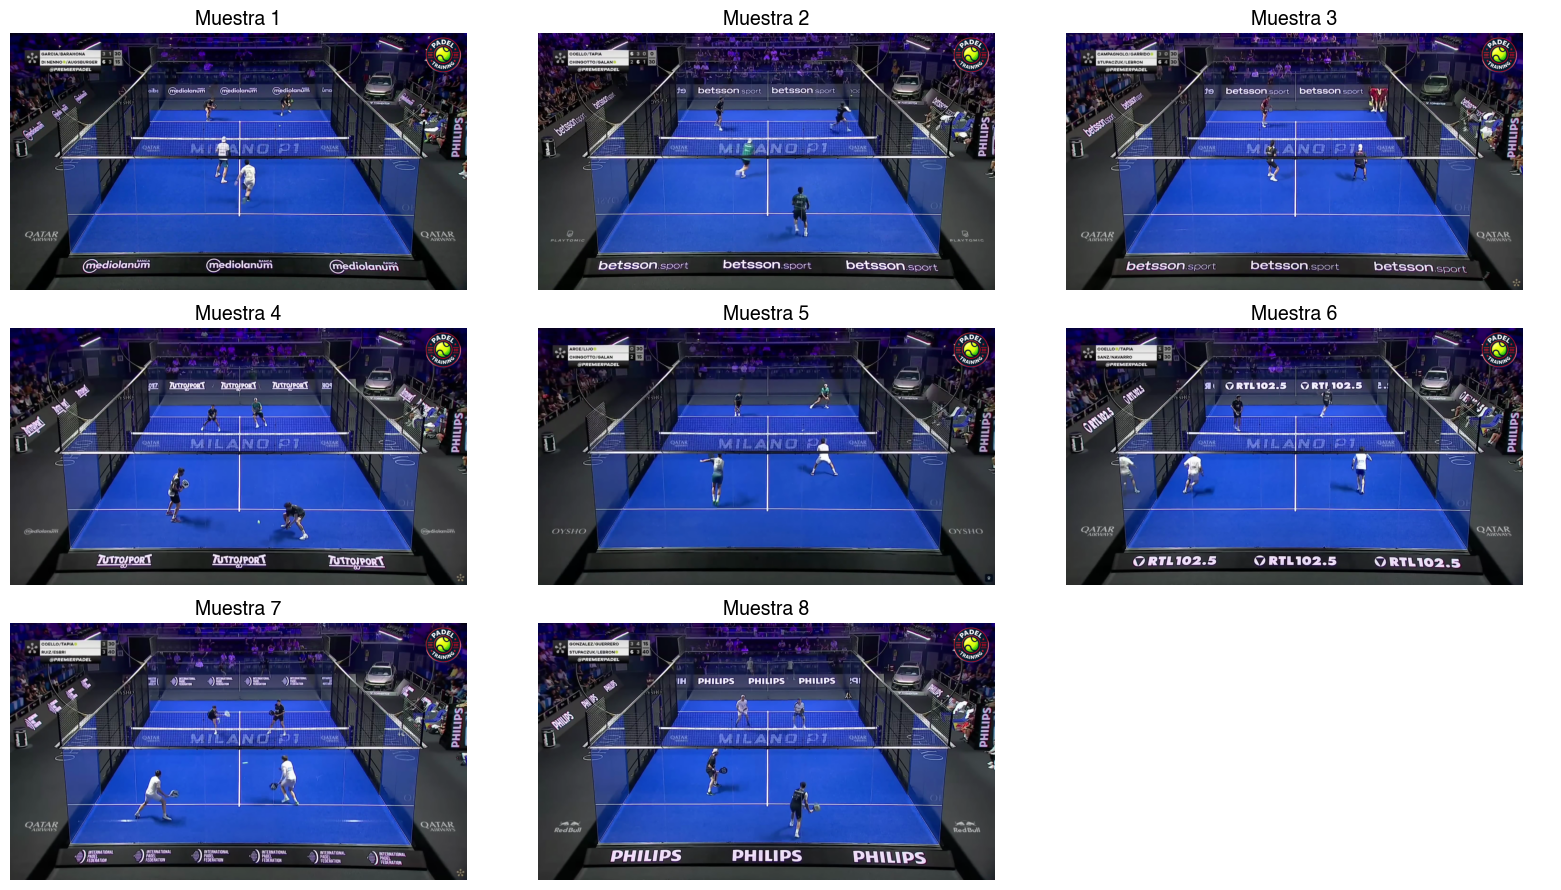

In [15]:
display_frames(youtube_frames)

## Need4PadelFest Dataset

In [10]:
nee4padelfest_dataset_path = Path("/Users/roberto/Desktop/UNIR-IA/Trabajo-Fin-de-Estudio/Dataset/Nee4PadelFest")
nee4padelfest_video_files = sorted([f for f in nee4padelfest_dataset_path.glob("*.mp4")])

In [11]:
nee4padelfest_video_info, nee4padelfest_total_duration = calculate_video_durations(nee4padelfest_video_files)

Video Durations:
----------------------------------------------------------------------
IMG_6547.mp4                                        54:51
IMG_6548.mp4                                        31:14
IMG_6552.mp4                                        94:22
IMG_6553.mp4                                        25:10
IMG_6554.mp4                                        16:07
IMG_6557.mp4                                        97:41
IMG_6583.mp4                                        50:48
IMG_6589.mp4                                        33:55
IMG_6590.mp4                                        50:01
IMG_6592.mp4                                        55:26
IMG_6593.mp4                                        58:53
IMG_6604.mp4                                        51:59
----------------------------------------------------------------------
Total Duration: 10h 20m 32s (37232.8 seconds)
Average Duration: 51.7 minutes
IMG_6589.mp4                                        33:55
IMG_6590.m

In [12]:
nee4padelfest_frames = extract_frames_from_videos(nee4padelfest_video_files, seed=20)

Found 12 videos
Extracting random frames...

Processing: IMG_6547.mp4...
Processing: IMG_6548.mp4...
Processing: IMG_6548.mp4...
Processing: IMG_6552.mp4...
Processing: IMG_6552.mp4...
Processing: IMG_6553.mp4...
Processing: IMG_6553.mp4...
Processing: IMG_6554.mp4...
Processing: IMG_6554.mp4...
Processing: IMG_6557.mp4...
Processing: IMG_6557.mp4...
Processing: IMG_6583.mp4...
Processing: IMG_6583.mp4...
Processing: IMG_6589.mp4...
Processing: IMG_6589.mp4...
Processing: IMG_6590.mp4...
Processing: IMG_6590.mp4...
Processing: IMG_6592.mp4...
Processing: IMG_6593.mp4...
Processing: IMG_6592.mp4...
Processing: IMG_6593.mp4...
Processing: IMG_6604.mp4...
Processing: IMG_6604.mp4...

Successfully extracted 12 frames

Successfully extracted 12 frames


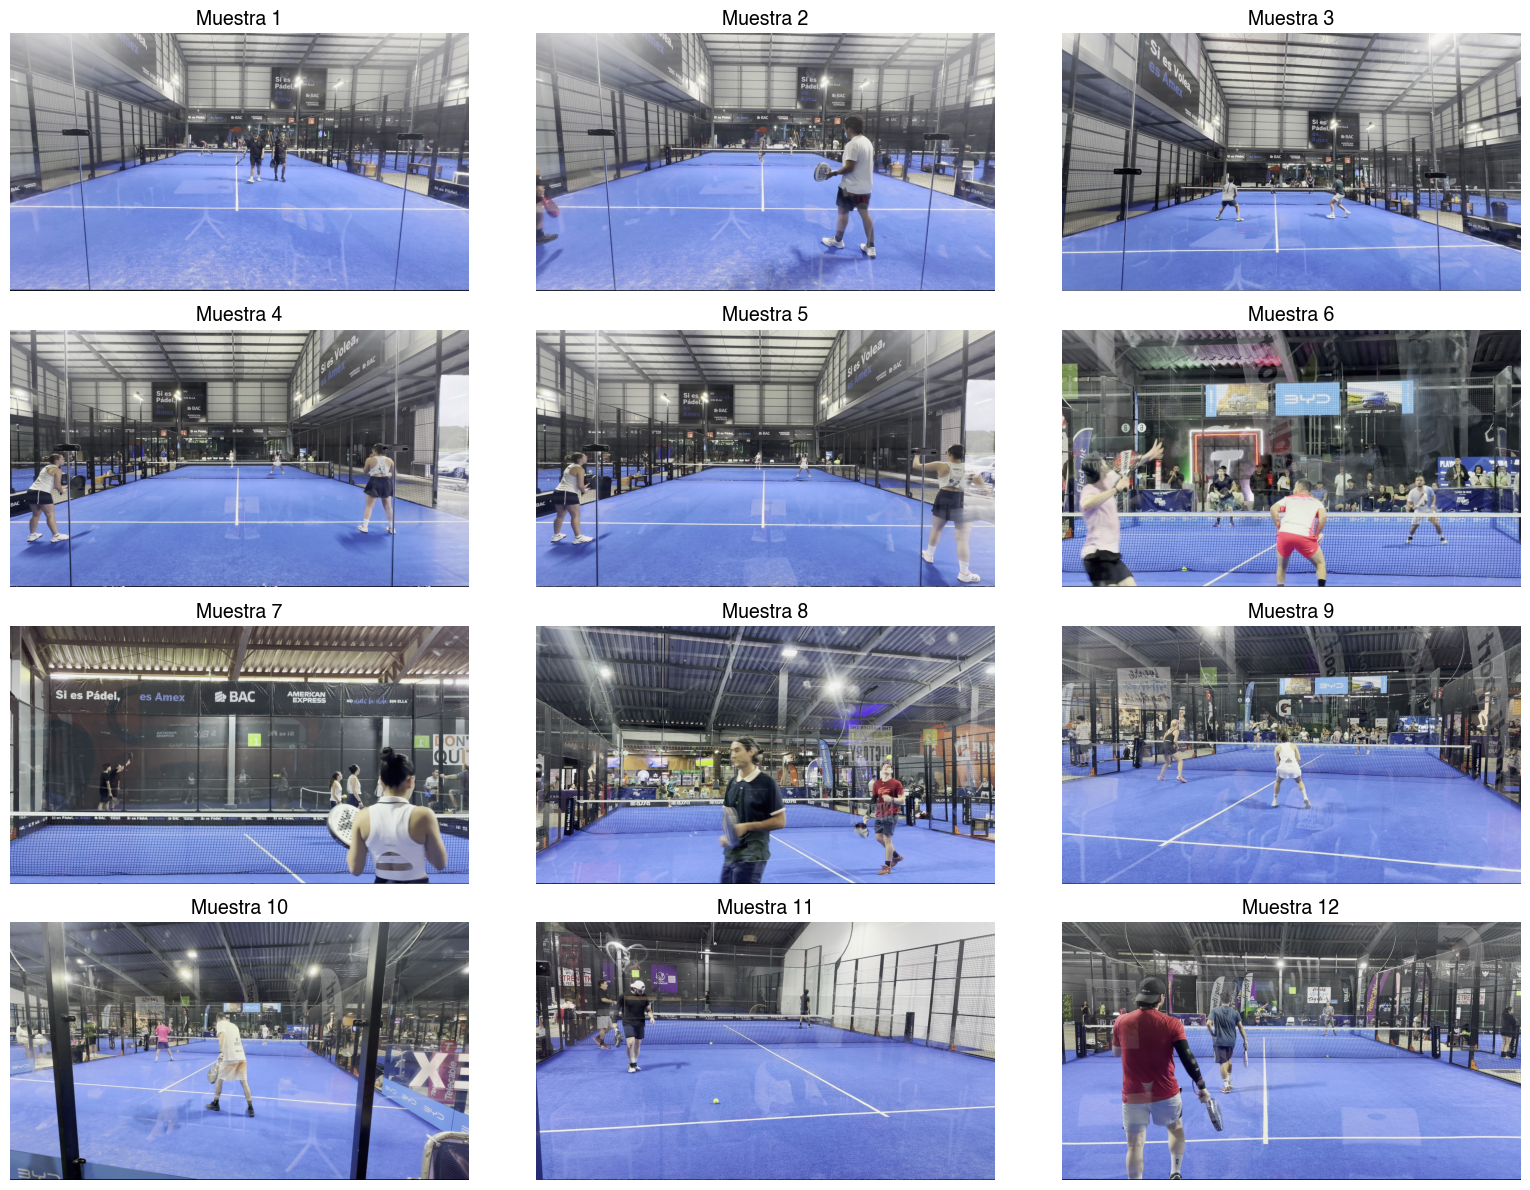

In [16]:
display_frames(nee4padelfest_frames)